# Линейная регрессия

На сегодняшнем занятии сначала посмотрим, как работает линейная регрессия на сгенерированных данных, а потом будем работать с датасетом BlackFriday (ниже есть его описание):

https://www.kaggle.com/mehdidag/black-friday/version/1

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

## Часть 1.

Сгенерируем данные для задачи регрессии (один признак и целевая переменная)

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


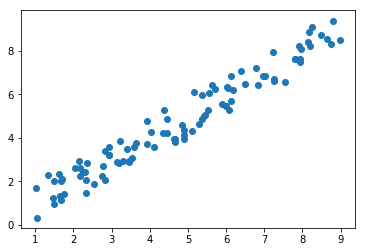

In [10]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

Разобъем данные на train и test.

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((80,), (20,), (80,), (20,))

Модель линейной регрессии принимает на вход **матрицу** объект-признак (т.е. объект, имеющий две размерности). Поэтому приведем Xtrain и Xtest к виду матрицы.

In [4]:
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)

Xtrain.shape, Xtest.shape

((80, 1), (20, 1))

Объявим модель и обучим её.

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предсказания на train и test.

In [7]:
pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

Нарисуем полученную регрессионную прямую.

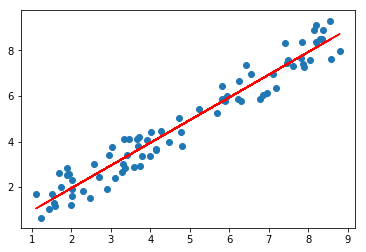

In [13]:
plt.scatter(Xtrain[:,0],ytrain)
plt.plot(Xtrain[:,0],pred_train,color='red')

Посчитаем MSE

In [14]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest)

(0.3138548630814039, 0.34216289666733185)

Хорошая ли получилась модель?

#### Задание:

1. Добавьте к исходным данным (x,y) точки (5,15) и (7,20).
2. Без разбиения на train и test обучите регрессию на всех данных.
3. Визуализируйте результат - данные и регрессионную прямую.
4. Посмотрите на метрику качества.
5. Посмотрите на веса обученной модели (model.coef_).

In [ ]:
#your code here

## Часть 2.

Теперь будем работать с табличным датасетом BlackFriday.

In [15]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

**Замените все пропущенные значения на 0.**

In [ ]:
data = # your code here

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = miscsing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Посмотрим, какие типы данных есть в нашем датасете. 

**Выведите на экран тип каждой колонки в таблице.**

In [ ]:
#your code here

Обработаем нечисловые колонки.

**1) Выведите на экран все возможные значения из столбца Gender.**

**2) Замените значение 'M' на 1, а 'F' на 0.**

In [ ]:
#your code here

Поработаем со столбцом Age.

**1) Выведите на экран все возможные значения из столбца Age.**

**2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.**

In [ ]:
#your code here

def map_age(age):
    #your code here
    
data['Age'] = data['Age'].apply(map_age)

Обработаем столбец City_Category.

**1) Выведите все уникальные значения данного столбца.**

**2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).**

In [ ]:
#your code here

Наконец, обработаем Stay_In_Current_City_Years.

**1) Выведите на экран все уникальные значения данного столбца.**

**2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).**

In [ ]:
#your code here

def map_stay(stay):
    #your code here
    
data['Stay_In_Current_City_Years'] = #your code here

In [ ]:
data.head()

**Удалите столбцы User_ID и Product_ID.**

In [ ]:
#your code here

# Исследование данных

**1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.**

**2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.**

**3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму.**

In [ ]:
#your code here

**Нарисуйте матрицу корреляций признаков.**

In [ ]:
plt.figure(figsize=(12,9))
#your code here

# Построение модели

Разобъем данные на train и test.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data.copy()

y = data['Purchase']
del X['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

**Обучите модель на тренировочных данных и сделайте предсказание на тесте.**

In [ ]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred = regressor.predict(Xtest)
print(ypred)

Вычислим качество модели.

In [ ]:
r2_score(ytest,ypred), mean_squared_error(ytest,ypred)

**Посмотрите на веса обученной модели.**

In [ ]:
#your code here

Посмотрим на качество модели на кросс-валидации.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor, X, y, cv=3)

**Какую ошибку мы смотрели? Посмотрите на r2 на кросс-валидации.**

In [ ]:
#your code here

Добавим L1 регуляризацию.

In [ ]:
from sklearn.linear_model import Lasso

regressor2 = Lasso()
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

**Посмотрите на веса при различных значениях alpha.**

In [ ]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1,100.1,25):
    #your code here

**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [ ]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

In [ ]:
lasso_cv.coef_

In [ ]:
lasso_cv.alpha_

In [ ]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))

**Посмотрите на веса линейной регрессии с L2-регуляризацией при различных значениях alpha.**

In [ ]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    #your code here

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [ ]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

In [ ]:
ridge_cv.alpha_

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3 = regressor3.predict(Xtest)

print('Scores:', r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))

Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

**Обучите ElasticNet с любыми значениями этих параметров. Посмотрите на качество.**

In [ ]:
from sklearn.linear_model import ElasticNet

#your code here

Посмотрим на веса, которые присвоила линейная регрессия признакам.

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

In [ ]:
len(data),len(Xtest)

# Feature Engineering*

Попробуйте соорудить новые признаки.

Идеи:

1) Группировка исходных признаков по бинам
(попробуйте сгруппировать числовые признаки, например, Product_Category_1(2,3))

2) Перемножение признаков, которые в паре могут влиять на результат (линейная регрессия не умеет умножать)

3) Взятие других функций от признаков.

In [ ]:
#your code here